# **Suivi du nettoyage des données sur l'étude des primes d'assurance**


Premièrement, on importe les librairies utiles au nettoyage des données, notamment Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

## Création d'un dataframe

On va stocker notre jeu de données dans un dataframe qui va aller chercher les infos de notre csv

In [2]:
df = pd.read_csv('dataset.csv')
df.head() # affiche les premières lignes de notre jeu de données

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


On va dans un premier temps aller chercher les informations des colonnes de notre Df et étudier s'il y a des types de données anormales.

In [6]:
df.info()
df.dtypes # On peut utiliser 'dtypes' pour synthétiser en ne gardant que le type des données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Vérification et nettoyage des données

Ensuite, nous allons vérifier s'il y a des valeurs nulles ou manquantes dans notre Df

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Ici, il n'y a pas de valeurs nulles dans notre jeu de données, donc pas de corrections à apporter à ce domaine.


On regarde maintenant si les données sont dupliquées / qu'il existe des doublons dans le jeu de données :

In [10]:
a = df.loc[df[['bmi', 'age', 'charges']].duplicated(keep=False),:] # on choisit les colonnes BMI, Age et Charges qui ne doivent pas comporter de doublons en théorie
print(a)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


On peut remarquer qu'il y a un doublon aux lignes indexées 195 et 581. Un seul doublon n'est pas très significatif sur l'ensemble de notre Df, mais par principe on va donc le supprimer.

In [9]:
df.drop_duplicates(subset=['bmi', 'age', 'charges'], inplace=True, ignore_index=True)

Nous allons désormer chercher les outliers, les valeurs aberrantes ou non conformes au jeu de données.


Pour cela, on regarde premièrement les données générales telles que les valeurs maximales et minimales et les moyennes à l'aide d'un describe.

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


En regardant les valeurs maximales, on se rend compte que les charges et le bmi montent à des valeurs qui paraissent potentiellement suspectes. On va donc jeter un oeil à l'index de ces lignes pour avoir un aperçu de l'ensemble des données pour ces valeurs.

In [13]:
b = df.loc[df['bmi']==53.13, :].index[0]
print(df.iloc[b,:])

age                18
sex              male
bmi             53.13
children            0
smoker             no
region      southeast
charges     1163.4627
Name: 1316, dtype: object


In [14]:
c = df.loc[df['charges']==63770.428010, :].index[0]
print(df.iloc[c,:])

age                  54
sex              female
bmi               47.41
children              0
smoker              yes
region        southeast
charges     63770.42801
Name: 543, dtype: object


On remarque que les valeurs sont effectivement suspectes mais pas totalement incohérentes, ce qui nous laisse penser qu'il faudra peut être revenir sur ces valeurs lors de la modélisation, mais qu'elles ne sont pour le moment pas inexploitables.

## Export des données propres

On exporte enfin les données propres dans un nouveau csv pour les analyser par la suite.

In [18]:
df.to_csv('datasetClean.csv', index=False)

(Suite pour le prochain notebook d'analyse)

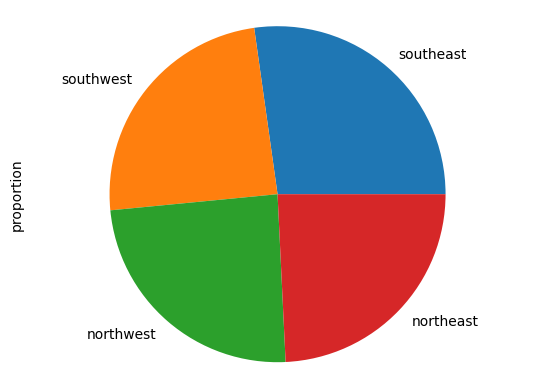

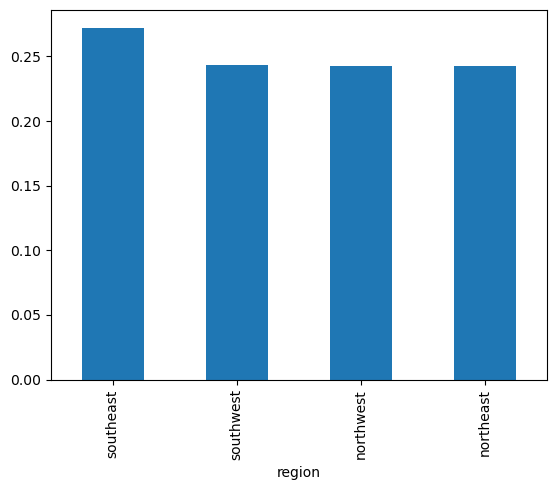

In [17]:
# Diagramme en secteurs
df["region"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
df["region"].value_counts(normalize=True).plot(kind='bar')
plt.show()